In [6]:
import os
from email.parser import Parser
import email.utils
import time
import datetime
from dateutil.parser import parse
import email
import re

raw_inbox_data=[]
clean_inbox_data=[]

top_users = open("HighActivity_Users.txt").read()
username=top_users.split('\n')


path = 'C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/midterm/data/enron/maildir'
for filename in os.listdir(path):
    if filename in username:
        for x in os.listdir(path+'/'+filename):
            if (x=='inbox')or(x=='notes_inbox'):
                for y in os.listdir(path+'/'+filename+'/'+x):
                    ab_path=path+'/'+filename+'/'+x+'/'+y
                    try:
                        f = open(ab_path, "r")
                        string_data = f.read()
                        email = Parser().parsestr(string_data)
                        raw_inbox_data.append(email.get_payload()) 
                    except Exception:
                        pass        
                    

In [7]:
import re
import nltk
regex = re.compile("[^a-zA-Z\s]")

clean_inbox_data = []
for x in raw_inbox_data:
    clean_inbox_data.append(regex.sub('', x.lower()))  # Regex to clean the corpus 
        
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

stop_words = set(stopwords.words("english"))
fin_inbox = ''.join(clean_inbox_data)

tokens = nltk.word_tokenize(fin_inbox)
wnl = nltk.WordNetLemmatizer()
lem_inbox = [wnl.lemmatize(t) for t in tokens]

lem_inbox_clean=[]
for x in lem_inbox:
    lem_inbox_clean.append(regex.sub('', x))  # Regex to clean the corpus 

lem_inbox_clean2 = [x for x in lem_inbox_clean if x]
filtered_inbox = [w for w in lem_inbox_clean2 if not w in stop_words]

print(filtered_inbox[:50])
    

['im', 'tomorrow', 'dave', 'original', 'message', 'herod', 'brenda', 'f', 'sent', 'thursday', 'january', 'pm', 'bass', 'eric', 'blanchard', 'timothy', 'baumbach', 'david', 'winfree', 'oneal', 'subject', 'lunch', 'since', 'mr', 'bass', 'didnt', 'follow', 'social', 'engagement', 'thought', 'would', 'anyone', 'interested', 'lunch', 'tomorrow', 'early', 'shoot', 'next', 'week', 'mr', 'hull', 'available', 'tomorrow', 'guy', 'let', 'know', 'well', 'go', 'dutch', 'expense']


In [8]:
# Use Custom made Positive & Negative Word Dictionary

neg_sent = open("negative.txt").read()
negative_words=neg_sent.split('\n')

pos_sent = open("positive.txt").read()
positive_words=pos_sent.split('\n')


In [9]:
dict_filtered_inbox = {}

for word in filtered_inbox:
    if word not in dict_filtered_inbox:
        dict_filtered_inbox[word] = 1
    else: dict_filtered_inbox[word]+=1
    
dict_filtered_inbox_words = [v[0] for v in sorted(dict_filtered_inbox.items(), key=lambda x:x[1],reverse=True)]
                             
print(len(dict_filtered_inbox_words))
print(dict_filtered_inbox_words[:10])

185740
['said', 'power', 'company', 'enron', 'ha', 'energy', 'would', 'wa', 'state', 'new']


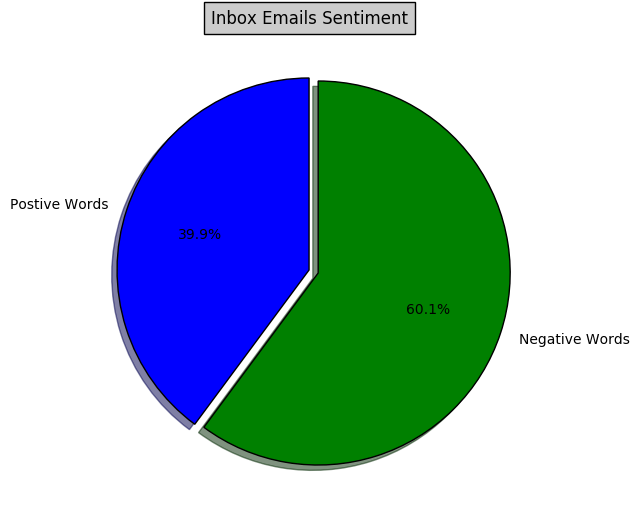

In [11]:
# Add a dictionary to lessen the words!!
# Sentiment Analysis
positive_counter=0
negative_counter=0

for word in dict_filtered_inbox_words:
    if word in positive_words:
        positive_counter=positive_counter+1
    elif word in negative_words:
        negative_counter=negative_counter+1
        
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Postive Words', 'Negative Words'
fracs = [positive_counter, negative_counter]
explode=(0, 0.05)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
               
title('Inbox Emails Sentiment', bbox={'facecolor':'0.8', 'pad':5})
show()
